### Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('adult.data.csv', header=None)
train = train.dropna()
train.shape

(32561, 15)

In [3]:
test = pd.read_csv('adult.test.csv', header=None)
test = test.dropna()
test.shape

(16281, 15)

In [4]:
data = pd.concat([train, test])
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
              'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.shape

(48842, 15)

In [5]:
data = data.replace('K.', 'K', regex=True)
data['income'].value_counts()

 <=50K    37155
 >50K     11687
Name: income, dtype: int64

In [6]:
data_hot = data.drop(columns=['education'])
data_hot = pd.get_dummies(data)
data_hot.shape, data_hot.columns

((48842, 110),
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
        'workclass_ Local-gov', 'workclass_ Never-worked',
        ...
        'native-country_ Scotland', 'native-country_ South',
        'native-country_ Taiwan', 'native-country_ Thailand',
        'native-country_ Trinadad&Tobago', 'native-country_ United-States',
        'native-country_ Vietnam', 'native-country_ Yugoslavia',
        'income_ <=50K', 'income_ >50K'],
       dtype='object', length=110))

### 정규화

In [7]:
X_train = data_hot.iloc[:32561, :-2]
y_train = data_hot.iloc[:32561, -1]
X_test = data_hot.iloc[32561:, :-2]
y_test = data_hot.iloc[32561:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32561, 108), (32561,), (16281, 108), (16281,))

### 분류

In [8]:
# K-Neightbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train) # 모델 최적화(Fitting)
knn.predict(X_test) # 예측하기
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8675409231903197, 0.7608869234076531)

In [9]:
# Linear
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.3691026868915954, 0.3616326153249724)

In [10]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=1).fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.3691003740219291, 0.3616993732437123)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.8703663892386597, 0.8602665683926048)

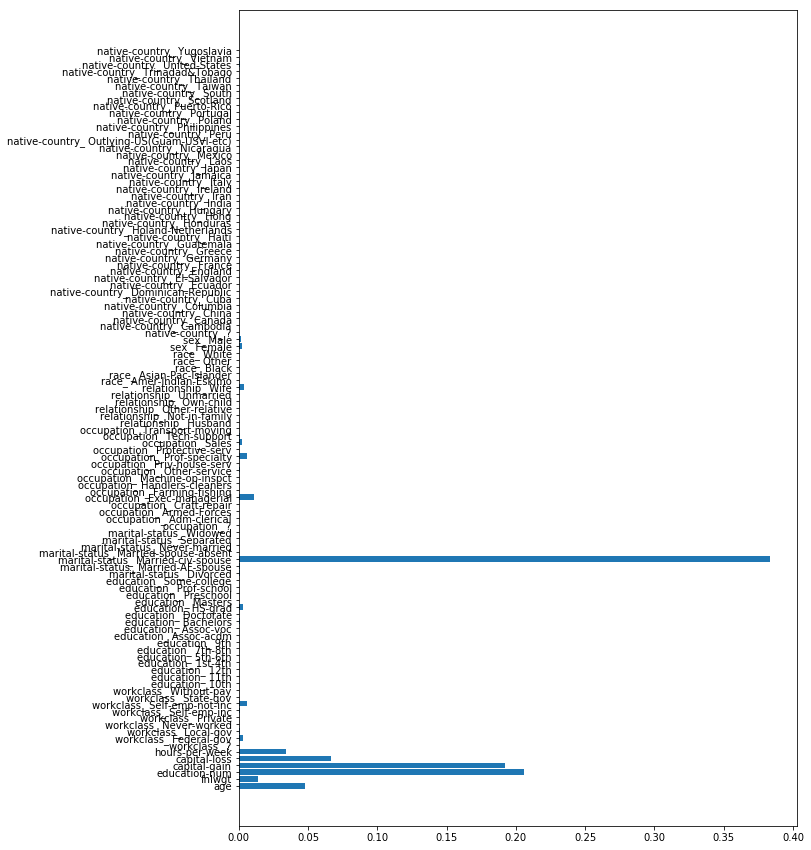

In [21]:
plt.figure(figsize=(10, 15))
plt.barh(X_train.columns, dt.feature_importances_)
plt.show()

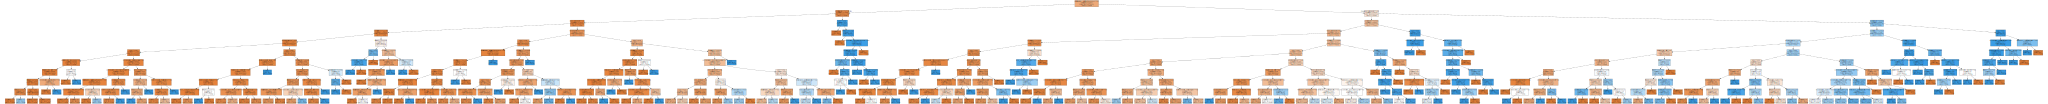

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.tree import export_graphviz
import graphviz  # anaconda prompt 에서 pip install graphviz 해야 함

export_graphviz(dt, out_file='tree.dot', class_names=['<=50K', '>50K'], feature_names=X_train.columns,
                impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
f.close()

tree_grp = graphviz.Source(dot_graph)
display(tree_grp)

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=10).fit(X_train, y_train) # n_estimators= 트리의 개수
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8644390528546421, 0.8583010871568085)

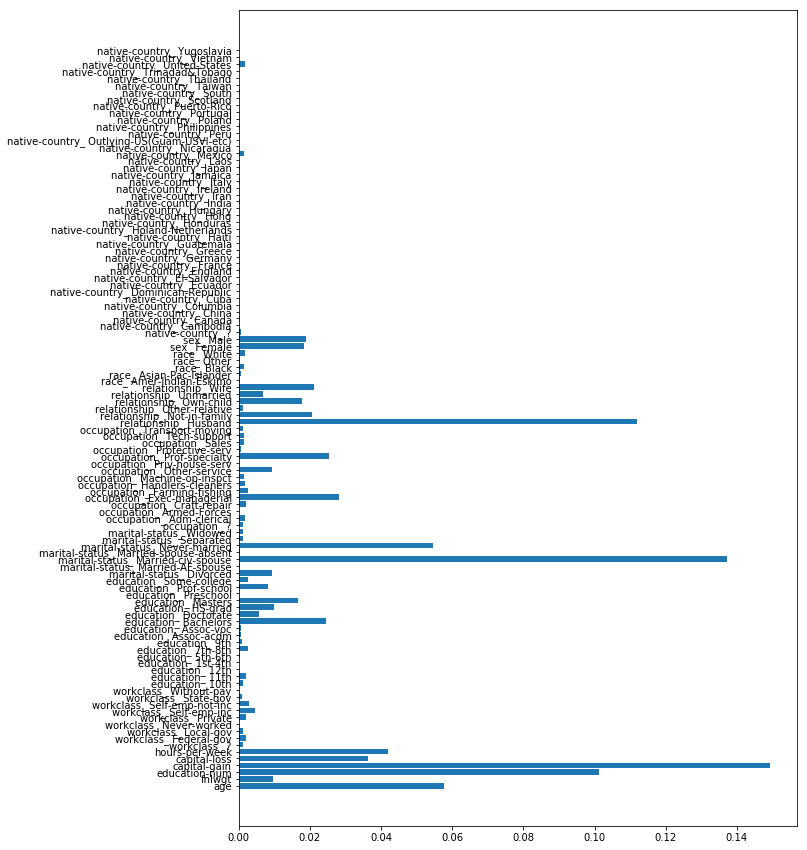

In [148]:
plt.figure(figsize=(10, 15))
plt.barh(X_train.columns, rf.feature_importances_)
plt.show()

In [149]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 10)).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

(0.7965971561069992, 0.7971869049812665)